In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('data/events.csv')

/home/july/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [5]:
data['timestamp'].head(2)

0    2018-05-31 23:38:05
1    2018-05-31 23:38:05
Name: timestamp, dtype: object

In [7]:
#Arreglo el tipo de dato de la columna "timestamp"
data["timestamp"] = pd.to_datetime(data["timestamp"])
data.dtypes

timestamp                   datetime64[ns]
event                               object
person                              object
url                                 object
sku                                 object
model                               object
condition                           object
storage                             object
color                               object
skus                                object
search_term                         object
staticpage                          object
campaign_source                     object
search_engine                       object
channel                             object
new_vs_returning                    object
city                                object
region                              object
country                             object
device_type                         object
screen_resolution                   object
operating_system_version            object
browser_version                     object
dtype: obje

Text(0,0.5,'Cantidad de eventos')

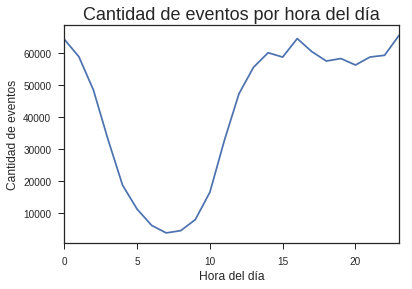

In [8]:
#Se obtiene la hora, se cuenta y se vuelca en un gráfico
grafico1 = data["timestamp"].dt.hour.value_counts().sort_index().plot()
grafico1.set_title("Cantidad de eventos por hora del día", fontsize=18)
grafico1.set_xlabel("Hora del día", fontsize = 12)
grafico1.set_ylabel("Cantidad de eventos", fontsize = 12)

In [9]:
#Se obtiene el día de la semana, se cuenta y se vuelca en un gráfico
days = {0: "Domingo",1: "Lunes",2:"Martes",3: "Miércoles",4: "Jueves",5: "Viernes",6: "Sábado"}

sorter = ["Domingo", "Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"]
sorterIndex = dict(zip(sorter,range(len(sorter))))

data["dia_semana"] = data["timestamp"].dt.dayofweek
data["dia_semana"] = data["dia_semana"].apply(lambda x: days[x])


In [12]:
event_day = data[['event','dia_semana']]

In [13]:
dfEventosAgrupado = event_day.groupby("dia_semana").count()
dfEventosAgrupado

,event
dia_semana,
Domingo,149385
Jueves,149371
Lunes,170020
Martes,164323
Miércoles,161868
Sábado,101709
Viernes,114612


In [14]:
dfEventosAgrupado["day"] = dfEventosAgrupado.index
dfEventosAgrupado["day"] = dfEventosAgrupado["day"].map(sorterIndex)


Text(0,0.5,'Cantidad de eventos')

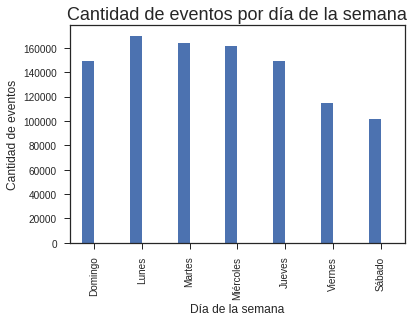

In [19]:
grafico = dfEventosAgrupado.sort_values("day").plot(kind = "bar")
grafico.legend_.remove()
grafico.set_title("Cantidad de eventos por día de la semana", fontsize=18)
grafico.set_xlabel("Día de la semana", fontsize=12)
grafico.set_ylabel("Cantidad de eventos", fontsize=12)

In [41]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [46]:
# separemos las cosas para que quede algo manejable; no tiene sentido tener el timestamp todo junto
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day

In [48]:
data['hour'] = data['timestamp'].dt.hour

In [89]:
data.event.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [73]:
dayevent = data[['event','day']]

In [91]:
checkconv = dayevent[(dayevent['event']=='conversion')|(dayevent['event']=='checkout')]

In [96]:
event_day_cant = checkconv.groupby('day').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [97]:
event_day_cant.head()

index  cantidad
day                        
1   0    checkout      1049
    1  conversion        34
2   0    checkout      1040
    1  conversion        31
3   0    checkout       966

In [98]:
event_day_cant= event_day_cant.rename(columns={'index':'event'})

Text(0.5,1,'cantidad de eventps')

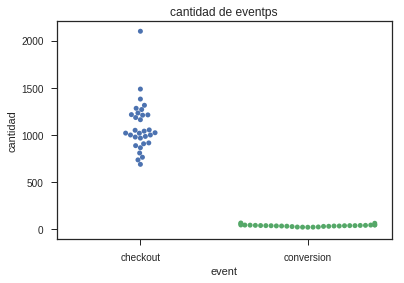

In [99]:
sns.swarmplot(x="event", y="cantidad", data=event_day_cant).set_title('cantidad de eventos estudiados por día'')

In [102]:
event_day = dayevent.groupby('day').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [103]:
event_day= event_day.rename(columns={'index':'event'})

Text(0.5,1,'cantidad de eventos estudiados por día')

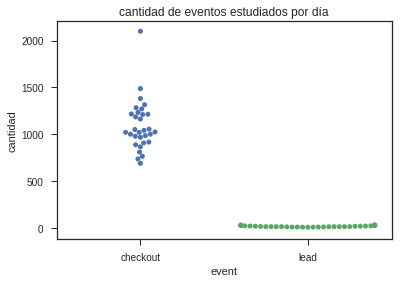

In [105]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='checkout')|(event_day['event']=='lead')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

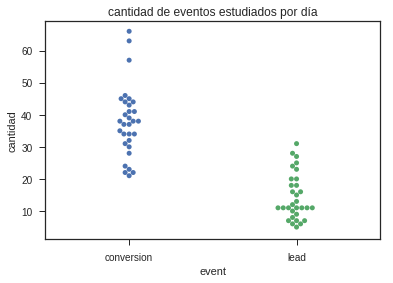

In [106]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='conversion')|(event_day['event']=='lead')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

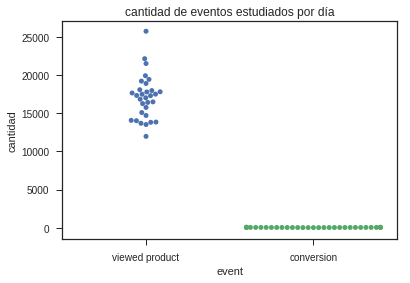

In [110]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='conversion')|(event_day['event']=='viewed product')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

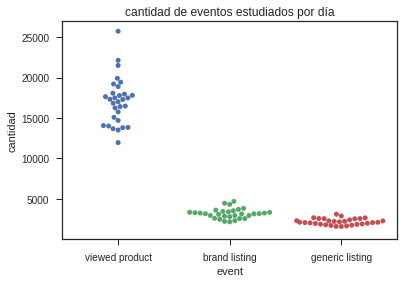

In [111]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='generic listing')|(event_day['event']=='brand listing')|(event_day['event']=='viewed product')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

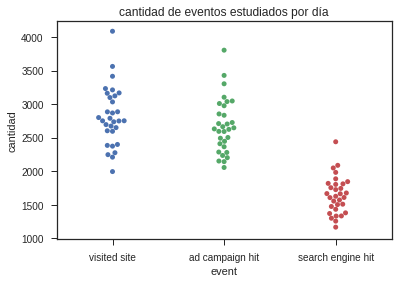

In [112]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='visited site')|(event_day['event']=='ad campaign hit')|(event_day['event']=='search engine hit')]).set_title('cantidad de eventos estudiados por día')

In [113]:
data.condition.value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

In [116]:
condition_event = data[['condition','event']]

In [117]:
event_condition = condition_event.groupby('condition').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [119]:
event_condition=event_condition.rename(columns={'index':'event'})

In [120]:
event_condition.head(2)

event  cantidad
condition                            
Bom       0  viewed product    227171
          1        checkout     15305

In [ ]:
sns.boxplot

Text(0.5,1,'cantidad de eventos estudiados por condición')

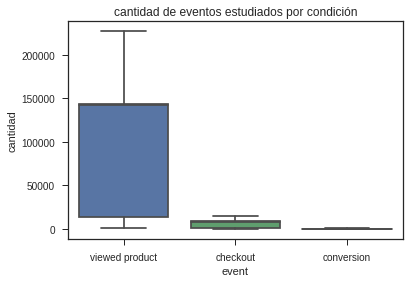

In [124]:
sns.boxplot(x="event", y="cantidad", data=event_condition).set_title('cantidad de eventos estudiados por condición')

In [115]:
data.storage.value_counts()

16GB     190833
32GB     184455
64GB     100024
128GB     40805
8GB       38181
256GB      6821
4GB        2152
512MB       565
Name: storage, dtype: int64

In [125]:
event_storage = data[['storage','event']]

In [126]:
event_storage = event_storage.groupby('storage').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [128]:
event_storage = event_storage.rename(columns={'index':'event'})

In [ ]:
sns.violinplot()

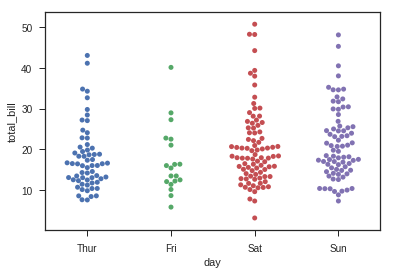

In [9]:
tips = sns.load_dataset("tips")
sns.swarmplot(x="day", y="total_bill", data=tips)

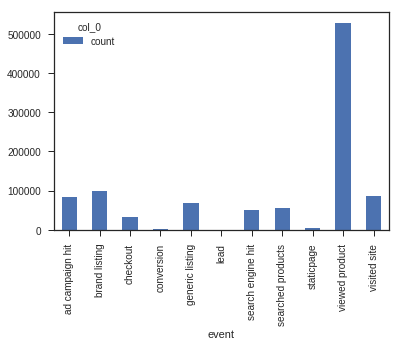

In [134]:
my_tab = pd.crosstab(index = data["event"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

In [135]:
from statsmodels.graphics.mosaicplot import mosaic



In [138]:
data.columns


Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [140]:
data.browser_version.value_counts()

Chrome 66.0                         22611
Chrome Mobile 66.0                  17513
Chrome 65.0                          6635
Chrome Mobile 65.0                   5665
Chrome Mobile 64.0                   3083
Chrome 67.0                          3073
Chrome Mobile 67.0                   2683
Chrome 64.0                          2450
Mobile Safari 11                     2071
Chrome Mobile 39                     1639
Chrome 63.0                          1490
Chrome Mobile 63.0                   1413
Samsung Internet 6.4                 1056
Firefox 60                           1049
Firefox 59                            918
Mobile Safari 10                      703
Edge 16.16299                         658
Chrome 49.0                           602
Chrome Mobile 62.0                    568
Chrome Mobile 55.0                    527
Chrome Mobile 43.0                    422
Chrome Mobile 61.0                    390
IE 11                                 385
Opera 53.0                        

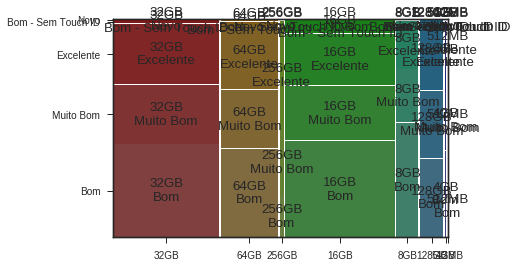

In [139]:
plt.rcParams['font.size'] = 16.0
mosaic(data, ['storage', 'condition']);